In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calmap as cp

df_us = pd.read_csv('us.csv', parse_dates=True, index_col='Date')
df_st = pd.read_csv('state.csv', parse_dates=True, index_col='Date')

In [12]:
print(df_us.tail())
print('\n' + '* ' * 45)
print(df_st.tail())

            Confirmed  Cumulated_Confirmed  Deaths  Cumulated_Deaths  \
Date                                                                   
2020-08-13      51335              5162091    1149            155430   
2020-08-14      55057              5217148    1234            156664   
2020-08-15      55348              5272496    1190            157854   
2020-08-16      42181              5314677     616            158470   
2020-08-17      37240              5351917     400            158870   

            Recovered  Cumulated_Recovered  
Date                                        
2020-08-13      30601              2843204  
2020-08-14      31943              2875147  
2020-08-15      25041              2900188  
2020-08-16      22536              2922724  
2020-08-17      50863              2973587  

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
             AK    AZ     CA   CO   HI   ID   MT   NM    NV   OR  ...  NH  \
Date       

In [3]:
print(df_us.info())
print('\n' + '* ' * 45)
print(df_st.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Confirmed            186 non-null    int64
 1   Cumulated_Confirmed  186 non-null    int64
 2   Deaths               186 non-null    int64
 3   Cumulated_Deaths     186 non-null    int64
 4   Recovered            186 non-null    int64
 5   Cumulated_Recovered  186 non-null    int64
dtypes: int64(6)
memory usage: 10.2 KB
None

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AK      186 non-null    int64
 1   AZ      186 non-null    int64
 2   CA      186 non-null    int64
 3   CO      186 non-null    int64
 4   HI      186 non-nu

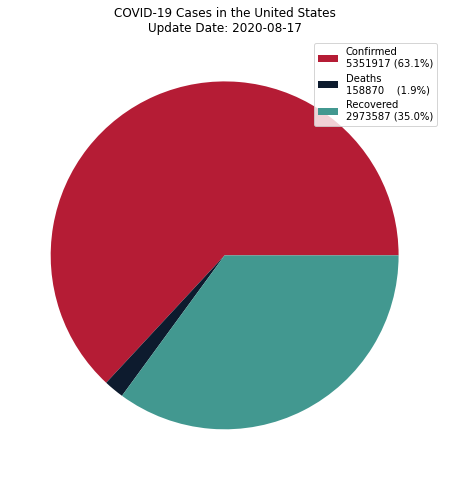

In [4]:
colors = ['#B51C35', '#0D1B2E', '#429890']
update_date = '2020-08-17'
n_cases = [df_us.loc[update_date, 'Cumulated_Confirmed'],
           df_us.loc[update_date, 'Cumulated_Deaths'],
           df_us.loc[update_date, 'Cumulated_Recovered']]

labels = ['Confirmed\n{} ({:.1f}%)'.format(n_cases[0],  100 * n_cases[0]/sum(n_cases)), 
          'Deaths\n{}    ({:.1f}%)'.format(n_cases[1],  100 * n_cases[1]/sum(n_cases)), 
          'Recovered\n{} ({:.1f}%)'.format(n_cases[2],  100 * n_cases[2]/sum(n_cases))]

title = 'COVID-19 Cases in the United States\nUpdate Date: {}'.format(update_date)

plt.pie(n_cases, colors=colors)
plt.gcf().set_size_inches(8,8)
plt.legend(labels)
plt.title(title)
plt.show()

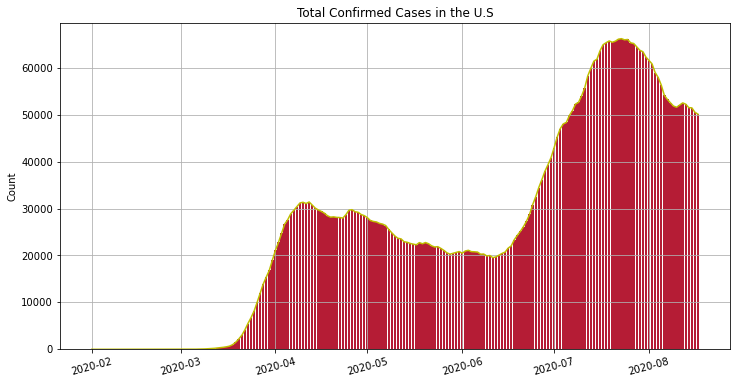

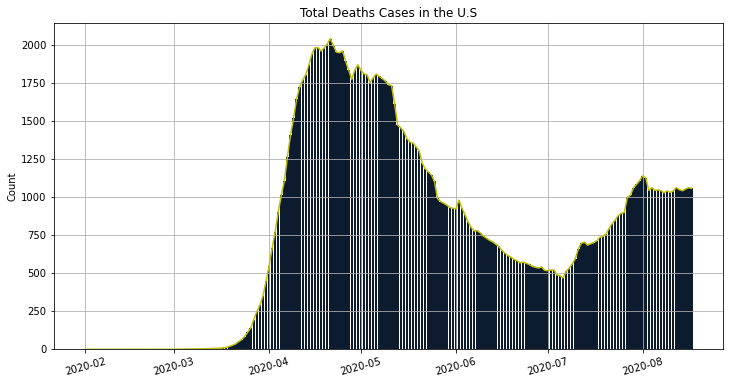

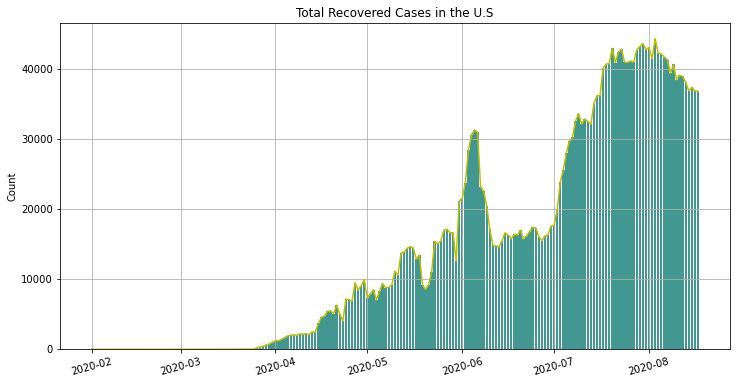

In [10]:
cases = {colors[0]: 'Confirmed', colors[1]: 'Deaths', colors[2]: 'Recovered'}
rolling_window = 7
rolling_us = df_us[cases.values()].rolling(rolling_window).mean()

for color , case in cases.items():
    plt.bar(rolling_us.index, rolling_us[case], color=color)
    plt.plot(rolling_us.index, rolling_us[case], color='y')
    plt.ylabel('Count')
    plt.xticks(rotation=15)
    plt.grid()
    plt.title('Total {} Cases in the U.S'.format(case))
    plt.gcf().set_size_inches(12,6)
    plt.show()

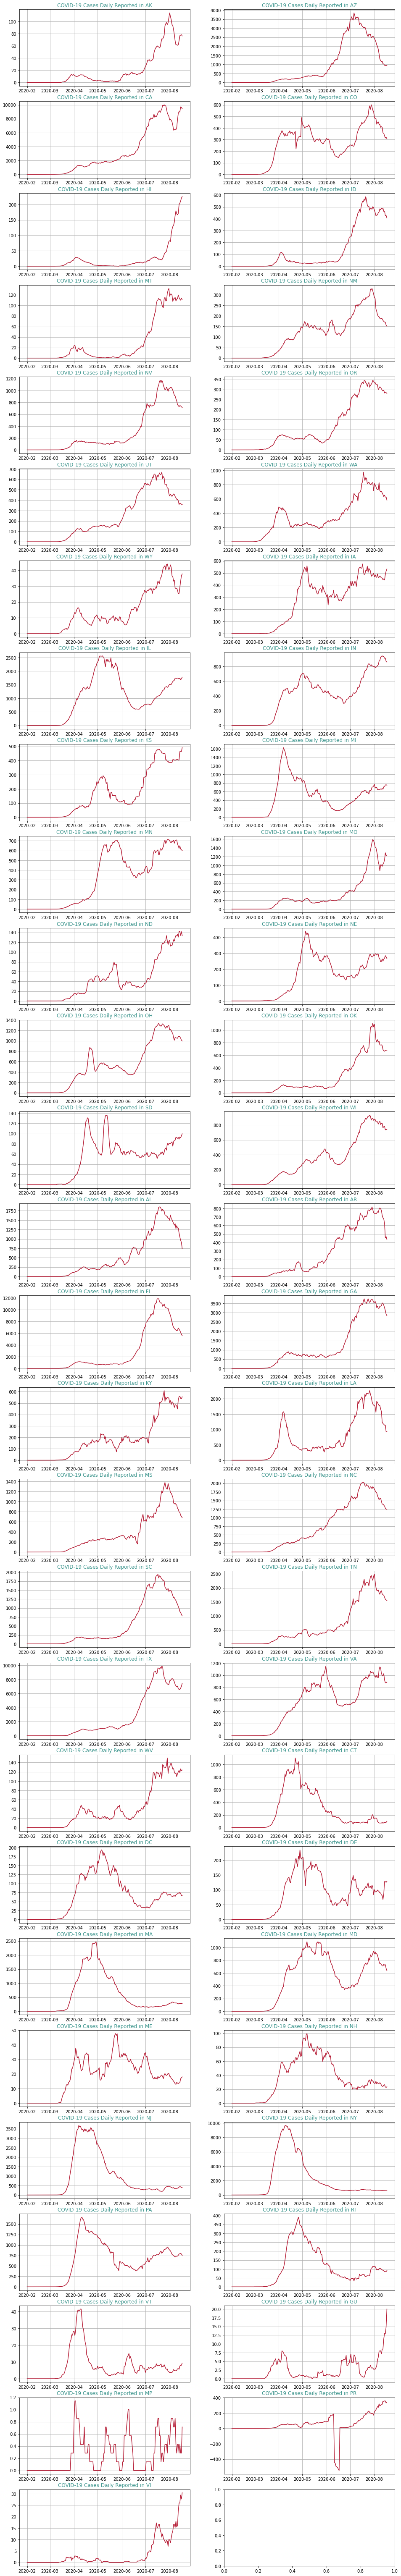

In [11]:
rolling_states = df_st.rolling(rolling_window).mean()

fig, axes = plt.subplots(28, 2, figsize=(16,112))
states = df_st.columns.to_list()

for k in range(len(states)):
    ax, state = axes[k // 2][k % 2], states[k]
    ax.plot(rolling_states[state], color=colors[0])
    ax.set_title('COVID-19 Cases Daily Reported in {}'.format(state), color=colors[2])
    ax.grid()

plt.show()

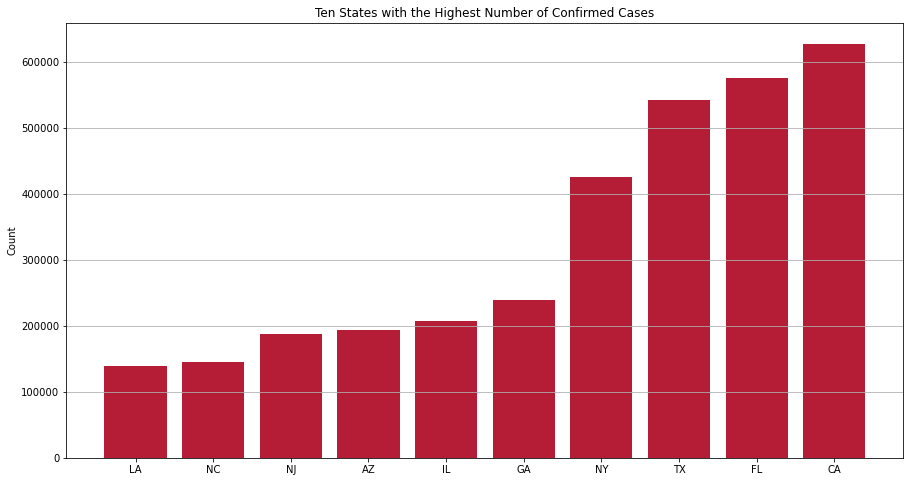

In [7]:
state_counts = df_st.sum().sort_values()
top_10 = state_counts[-10:]
bot_10 = state_counts[:10]
plt.bar(top_10.index, top_10.values, color=colors[0])
plt.grid(axis='y')
plt.ylabel('Count')
plt.title('Ten States with the Highest Number of Confirmed Cases')
plt.gcf().set_size_inches(15,8)
plt.show()

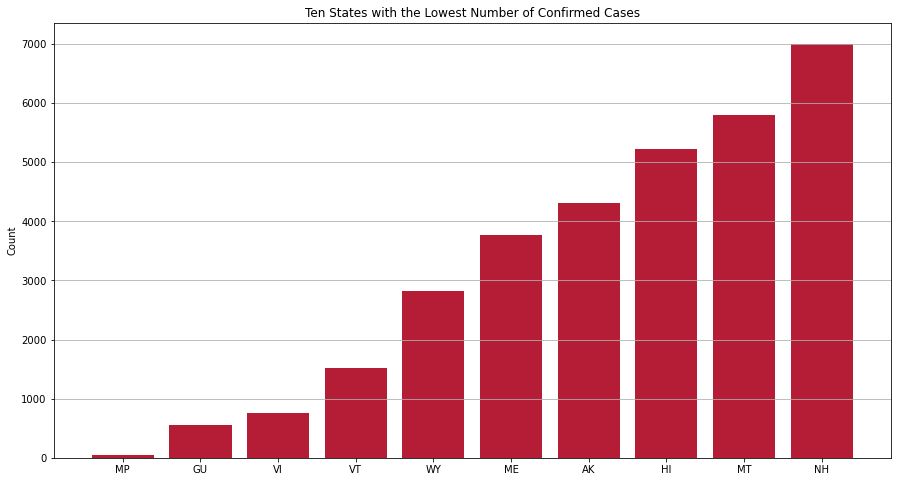

In [8]:
bot_10 = state_counts[:10]
plt.bar(bot_10.index, bot_10.values, color=colors[0])
plt.grid(axis='y')
plt.ylabel('Count')
plt.title('Ten States with the Lowest Number of Confirmed Cases')
plt.gcf().set_size_inches(15,8)
plt.show()